### Loading packages and data

In [1]:
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

In [3]:
# Download data from google drive (Respect Eng / Wiki Collab): wikipdia data/v2_annotated
blocked_dat = pd.read_csv('../data/annotated_1k_no_admin_blocked_user_post_sample.csv')
random_dat = pd.read_csv('../data/annotated_1k_no_admin_post_sample.csv')

In [4]:
# Removing irrelevant differing columns
del blocked_dat['na_gold']
del random_dat['unnamed_0']

In [5]:
blocked_dat['dat_type'] = 'blocked'
random_dat['dat_type'] = 'random'

In [6]:
# Do both arrays now have the same columns?
(random_dat.columns == blocked_dat.columns).all()

True

In [7]:
dat = pd.concat([blocked_dat, random_dat])

In [8]:
# Remove test questions
dat = dat[dat['_golden'] == False]

In [9]:
# Replace missing data with 'False'
dat = dat.replace(np.nan, False, regex=True)

In [10]:
# Group the data
grouped_dat = dat.groupby(['dat_type','rev_id'], as_index=False).agg({'clean_diff': 'first', 'is_harassment_or_attack': 'mean', 
                                           'how_aggressive_or_friendly_is_the_tone_of_this_comment': 'mean', 'na': 'mean'})

In [11]:
# Get rid of data which the majority thinks is not in English or not readable
grouped_dat = grouped_dat[grouped_dat['na'] < 0.5]

### Plot histogram of average ratings by comment

In [12]:
def hist_comments(df, bins, dat_type, plot_by, title):
    return df[df['dat_type'] == dat_type][[plot_by]].plot.hist(bins = bins, legend = False, title = title)

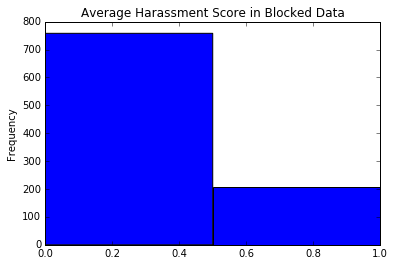

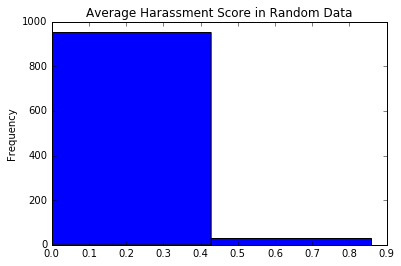

In [13]:
plt.figure()
hist_comments(grouped_dat, 2, 'blocked', 'is_harassment_or_attack', 'Average Harassment Score in Blocked Data')
hist_comments(grouped_dat, 2, 'random', 'is_harassment_or_attack', 'Average Harassment Score in Random Data')

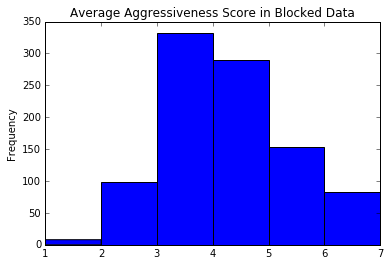

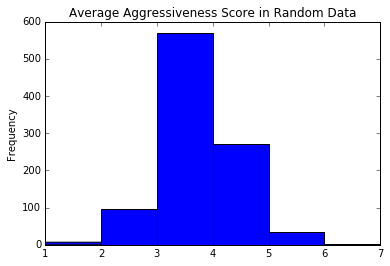

In [14]:
bins = [1,2,3,4,5,6,7]
plt.figure()
hist_comments(grouped_dat, bins, 'blocked', 'how_aggressive_or_friendly_is_the_tone_of_this_comment', 
              'Average Aggressiveness Score in Blocked Data')
hist_comments(grouped_dat, bins, 'random', 'how_aggressive_or_friendly_is_the_tone_of_this_comment', 
              'Average Aggressiveness Score in Random Data')

### Most harassing and aggressive comments

In [15]:
def sorted_comments(df, sort_by, is_ascending, num, dat_type = None):
    if dat_type:
        return df[df['dat_type'] == dat_type][['clean_diff',
            'is_harassment_or_attack', 'how_aggressive_or_friendly_is_the_tone_of_this_comment']].sort_values(
            by=sort_by, ascending = is_ascending)[0:num]
    return df[['clean_diff', 'dat_type', 'is_harassment_or_attack', 
        'how_aggressive_or_friendly_is_the_tone_of_this_comment']].sort_values(
        by=sort_by, ascending = is_ascending)[0:num]

Most harassing comments in aggregated dataset

In [16]:
sorted_comments(grouped_dat, 'is_harassment_or_attack', False, 5)

,clean_diff,dat_type,is_harassment_or_attack,how_aggressive_or_friendly_is_the_tone_of_this_comment
133,", oh shit, stop making warnings, motherfucker, also, fuck you.",blocked,1,6.571429
409,I wanted to let you know that Tymon.r. is a stupid moron.,blocked,1,5.285714
552,"Are you fucking serious? Again, what Hume have you read? Go fuck yourself, ignoramus. Stop trolling and spamming my talk page and spend the time actually getting an education and reading a book on philosophy for once in your life before you continue to make pointless, masturbatory edits on pages well beyond your comprehension. Please share, what is your interest i Hume beyond being a thorn in my side?",blocked,1,6.571429
866,you bitch why didn't you block kew gardens he also went past the 3 revert fucking rule god man,blocked,1,6.000000
744,Hahahaha!!! \n\nFuck you! You are a Chinese pig!,blocked,1,6.857143


Most aggressive comments in aggregated dataset

In [17]:
sorted_comments(grouped_dat, 'how_aggressive_or_friendly_is_the_tone_of_this_comment', False, 5)

,clean_diff,dat_type,is_harassment_or_attack,how_aggressive_or_friendly_is_the_tone_of_this_comment
743,Hahahaha!!! \n\nFuck you! You are a Chinese pig!,blocked,1,7.000000
471,"Hey fucking pig \n\nHey fucking pig-of-a-bully; I'll fuck off sure, but after you fuck out from Wikipedia completely you fucking bitch.",blocked,1,6.857143
747,Fuck you!!!You are a pig!,blocked,1,6.857143
744,Hahahaha!!! \n\nFuck you! You are a Chinese pig!,blocked,1,6.857143
404,Sucker \n\nYou suck the di*k of chicken fuc*ers.,blocked,1,6.857143


### Least harassing and aggressive comments

Least harassing comments in aggregated dataset

In [18]:
sorted_comments(grouped_dat, 'is_harassment_or_attack', True, 5)

,clean_diff,dat_type,is_harassment_or_attack,how_aggressive_or_friendly_is_the_tone_of_this_comment
0,]\n\nFine you testing the waters again despite past history and TMers failure to comply with COI. When you actually try and make the article neutral and controvert the fringe theories is when I anticipate the problem. I too tried to assume good faith at first despite past history. We shall see.,blocked,0,3.571429
1269,"would you be of help \n\nHello Vsmith I am an environmental microbiologist in my country. I want to start a company that manages waste and am hoping you could help link with corporate companies who could assist in coming to invest with me in my country,Nigeria,She is not yet developed in terms of commercial waste management and am hoping I could get some international collaborators to start with. Do reply to my message my email is pejusho@yahoo.co.uk. I will be greatly pleased to read from you. Thanks. Peju Sowunmi.Gleamber Company Limited",random,0,3.000000
1268,Finally! I got a Wikipedia account!,random,0,2.714286
1267,"I already saw your apology. You pinged me. You didn't need to make a new thread here. GamerPro64 23:14, 20 September 2014 (UTC)",random,0,3.571429
1266,"Those Phillies, on the other hand... :)",random,0,3.714286


Least aggressive comments in aggregated dataset

In [19]:
sorted_comments(grouped_dat, 'how_aggressive_or_friendly_is_the_tone_of_this_comment', True, 5)

,clean_diff,dat_type,is_harassment_or_attack,how_aggressive_or_friendly_is_the_tone_of_this_comment
298,"Merci Beaucoup \n\nA very kind thank you, Geraldine.",blocked,0,1.428571
1196,"You are most gracious and kind, thank you. \n\nThank you. Much appreciated. I should like to take you up on inquiries at a later date, though I am most grateful for your offer today.:0)))",random,0,1.428571
1191,Thank you very much! Cheers!,random,0,1.428571
336,"(UTC)\nInserting citations\nHi Ariel,\n\nhere is the code now:\n http://angielittlefield.com/ebooks/TomThomsonTorontoNeighbourhoods.pdf Indeed, Thomson painted a number of watercolours between 1904 and 1909.http://www.tomthomsoncatalogue.org/catalogue/index.php?pageNum=0 \nokay step one is erase the two cn tags\n\nstep two - in front of the http insert thus step three - athe end of the url ref put this \nI will go correct the first one. Then please you try correcting the second one, and I am sure you will go perfect! The article is shaping up quite well! Congrats. Please ask any questions here, and I will answer them for you. You may also email me from the link at the top of my talk page, or you can also post a note on my talk page. I am glad to help! I really enjoy collaborating with other editors! Just ask! Cheers! 18:39, 27 May 2015",blocked,0,1.571429
38,"Such a friendly, helpful and encouraging person (82.132.222.241 )",blocked,0,1.571429


### Inter-annotator agreement